<a href="https://colab.research.google.com/github/abuebayyeh/imperial_eee_machine_learning_course/blob/main/08_ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering


---


Clustering is a fundamental technique in the field of unsupervised machine learning. Unlike supervised learning, clustering does not rely on pre-assigned labels for classification tasks. Instead, it groups data points based on their inherent similarities and patterns. In this Google Colab tutorial, we will explore clustering algorithms, focusing on K-means clustering, and apply it to the famous Iris dataset. Our goal is to demonstrate how clustering can be used for feature classification without the need for labeled data.

## Unsupervised Learning

In machine learning, clustering falls under the category of unsupervised learning. This means that it doesn't require prior knowledge of class labels or categories to partition the data. Instead, it identifies natural groupings or clusters within the data based solely on the features or characteristics of the data points.

## Clustering Algorithms

Two commonly used clustering algorithms are **Hierarchical Clustering** and **K-means Clustering**. These methods differ in their approach to forming clusters.

### Hierarchical Clustering

Hierarchical clustering can be categorized into two main types: agglomerative and divisive.

- **Agglomerative Clustering**: This method starts with individual data points (leaves) and progressively merges them into clusters. The merging process continues until a predefined stopping criterion is met.

- **Divisive Clustering**: In contrast to agglomerative clustering, divisive clustering begins with a single cluster that contains all data points (root) and then recursively splits it into smaller clusters.

The choice between these two approaches depends on the **linkage criterion**, which is determined by the pairwise distances between data points. Different linkage criteria lead to different hierarchical clustering outcomes.

### K-means Clustering

K-means clustering, on the other hand, is a partitioning-based approach. It starts by defining a predetermined number of cluster centers, denoted as 'K.' These cluster centers are also referred to as centroids. K-means initialization involves placing these centroids randomly within the dataset.

The algorithm iteratively assigns data points to the nearest centroid, forming clusters based on proximity. The **Euclidean distance** is commonly used to measure the similarity between data points and centroids. The process continues until the centroids' positions no longer change significantly, indicating convergence to an optimal solution. The process can be visualised in the figure below:

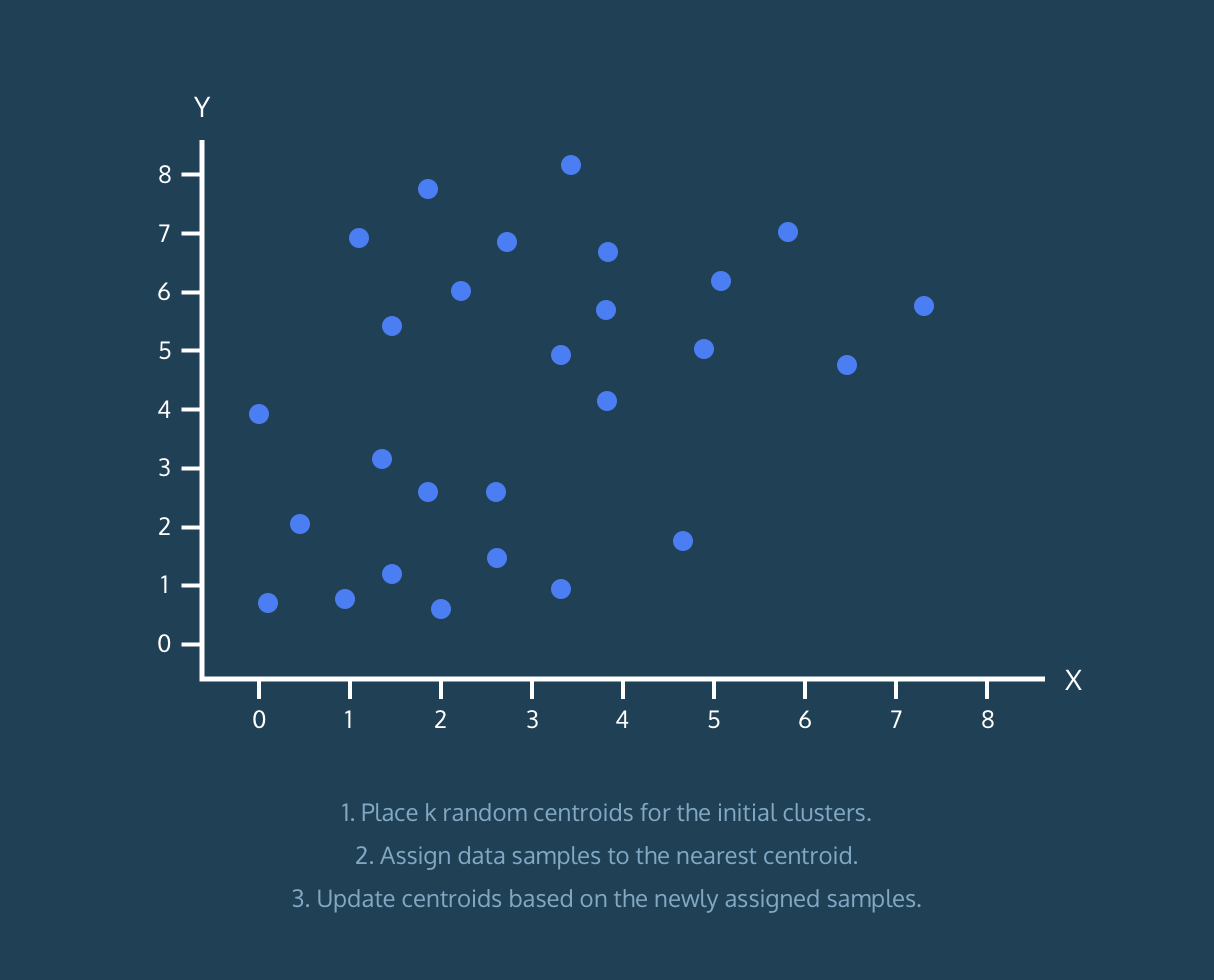

[[Image Source]](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet)

## Objective

In this tutorial, we will focus on **K-means clustering** and apply it to the Iris dataset. Our primary aim is to demonstrate the application of clustering in feature classification without relying on predefined labels. We will evaluate the quality of our clustering using a scoring function that aims to minimize the distances between data points and their respective cluster centroids.

The scoring function we aim to minimize is defined as:

$
J(\mathcal{C})=\sum_{i=1}^{k} \sum_{x_j\in \mathcal{C}_i}^{} \|x_j - \mu_i \|^2
$

Here, $k$ represents the number of clusters, $C$ denotes the cluster assignments, $x_j$ represents data points, and $\mu_i$ represents the centroids of the clusters. The goal is to find the clustering that minimizes this score function, indicating well-separated clusters.


In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import datasets

#Import accuracy_score
from sklearn.metrics import accuracy_score

In [180]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

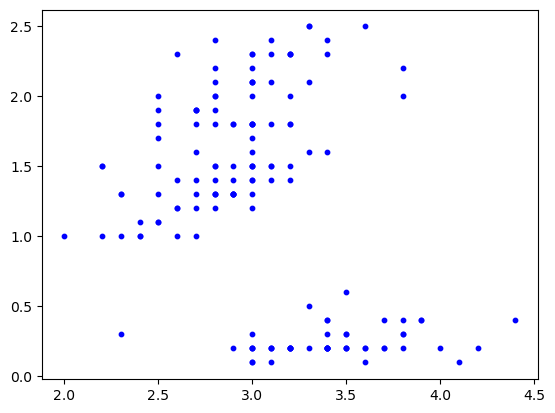

In [181]:
# Here we use the two features sepal length and pertal length
x = iris_data.iloc[:, [0,2]]

# Uncomment the below code for using sepal width and petal width instead
x = iris_data.iloc[:, [1,3]]

X= x.to_numpy()
plt.scatter(X[:,0], X[:,1], color='b', s=10)
plt.show()

In [182]:
def distance_centers(X,centers):
    """
    Estimating the distance between each data point and the centers using Eulidean distance
    Return the distances and vector that represents class of each data point
    """
    distance = np.array([ np.sum((X-center)**2,axis=1) for center in centers ])
    label = distance.argmin(axis=0)
    return distance, label

In [183]:
def update_centers(X,labels,k):
    """
    Updating the newly formed centers.
    Reurn the new center value
    """
    new_center = np.array([ X[labels == i ].mean(axis=0) for i in range(k)])
    return new_center

In [184]:
def stopping_condition(old_centers,new_centers,current_iter,max_iters):
    """
    If centers are no longer converging or max_iteration is reached stop the algorithm
    """
    if current_iter > max_iters: return True
    return (old_centers == new_centers).all()

In [185]:
def plot_centers(X, centers, labels):
    plt.scatter(X[:,0], X[:,1], s=7, c=labels)
    plt.scatter(centers[:,0], centers[:,1], marker='p', c='r', s=100, label='Cluster centers');
    plt.legend()
    plt.show()

In [186]:
def fit(X,k,max_iters,show_plots):
    """
    Main function that applies Kmeans
    """
    # Intialise centers with random values
    np.random.seed(90)
    centers = X[np.random.choice(X.shape[0], k), :]

    labels = old_centers = None
    iteration = 1
    # Plot intialised centers
    if show_plots == True:
        print('Intialise cluster centers:\n', centers)
        plot_centers(X, centers, labels)

    while not stopping_condition(old_centers,centers,iteration,max_iters):
        distance, labels = distance_centers(X,centers)
        old_centers = centers
        centers = update_centers(X,labels,k)
         # Plot updated centers
        if show_plots == True:
            print('Updated cluster centers:\n', centers)
            plot_centers(X, centers, labels)
        iteration += 1
    # calculate the sum of squared errors (SSE) for Elbow method
    SSE = (np.min(distance, axis=0)**2).sum()
    return centers, labels, SSE

Intialise cluster centers:
 [[3.  1.4]
 [2.8 2.4]
 [2.7 1. ]]


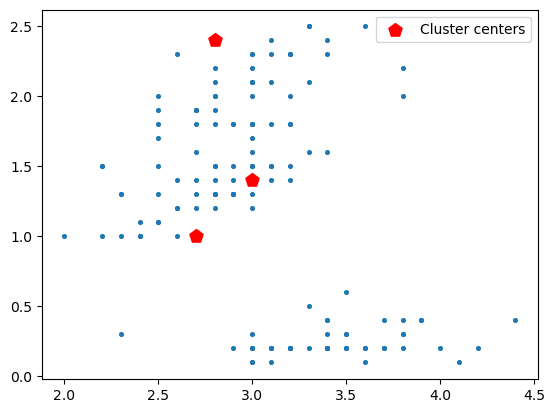

Updated cluster centers:
 [[3.00408163 1.49183673]
 [3.02121212 2.17575758]
 [3.11323529 0.51470588]]


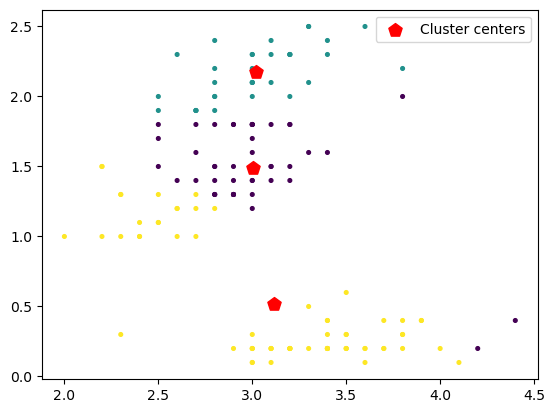

Updated cluster centers:
 [[2.78333333 1.42121212]
 [3.04411765 2.17058824]
 [3.428      0.246     ]]


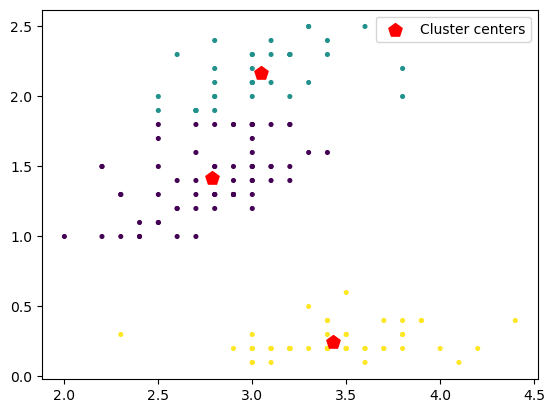

Updated cluster centers:
 [[2.745  1.385 ]
 [3.0625 2.1125]
 [3.428  0.246 ]]


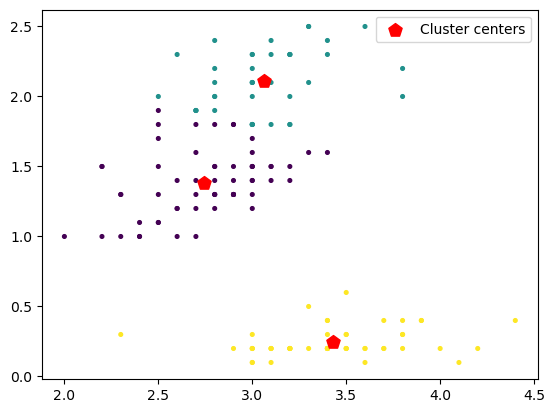

Updated cluster centers:
 [[2.71636364 1.35454545]
 [3.06222222 2.06888889]
 [3.428      0.246     ]]


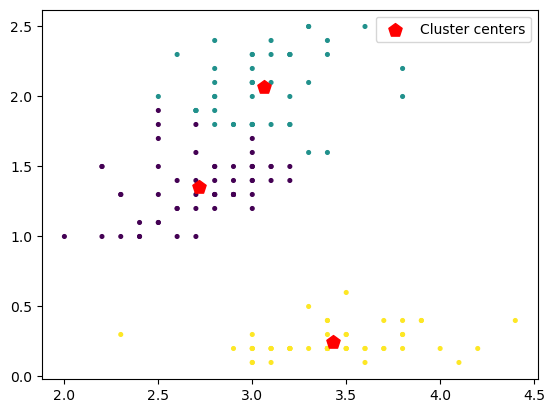

Updated cluster centers:
 [[2.71111111 1.34814815]
 [3.06086957 2.06086957]
 [3.428      0.246     ]]


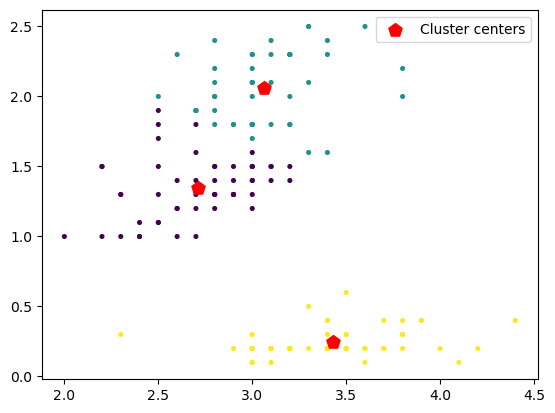

In [187]:
k = 3
show=True
max_iters=5
centers,labels, _ = fit(X,k,max_iters,show)

# Elbow Method

Since Iris-dataset is labelled according to three classes (i.e. Setosa, Virginica and Versicolor), we know in fact that the optimum $k$ (number of centers) should be three as demonstrated in the code above. However, we usually implement unsupervised learning on unlabelled data, which make it difficult to guess the value of $k$. Elbow method can be considered a systematic method to estimate the value of $k$. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 8 in the examples above), and for each value of k calculate the sum of squared errors (SSE) as shown in the below cell. Hence, it is not guaranteed that the elbow method will choose the optimum value of $k$, but at least it gives an intuition of an approximate value. For example, if we applied the elbow method on the Iris-dataset, we can see the curve rapidly tapers off after $k=3$ which is our optimum $k$. But according to the same curve, choosing a value $k=2$ is still acceptable.

/var/folders/tw/s40nhq2d0wz_0mhfyft2txwh0000gn/T/ipykernel_78892/3644509628.py:6: RuntimeWarning: Mean of empty slice.
  new_center = np.array([ X[labels == i ].mean(axis=0) for i in range(k)])
/Users/hasnatchowdhury/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


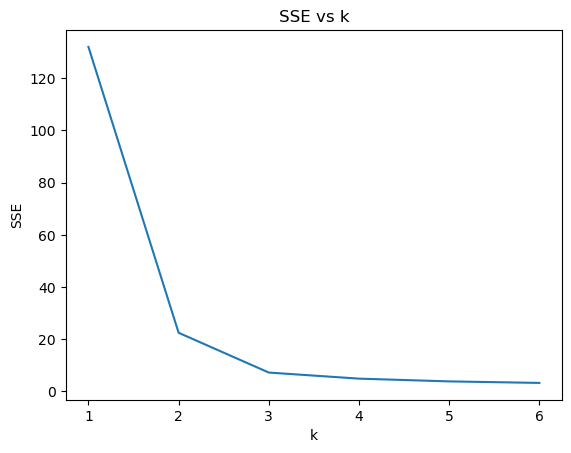

In [188]:
ks = np.arange(1,8)
sse_arr = []
show=False
for k in ks:
    _, _, sse = fit(X, k, max_iters, show)
    sse_arr.append(sse)
plt.plot(ks,sse_arr)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE vs k')
plt.show()

## Task 1 [40 marks]
Since we have already the labels of this dataset, we can assess the performance of K-means clustering using them. The goal is to estimate the error of the clustering predictions made by K-means.

- Compare the cluster assignments obtained from K-means clustering with the original labels of the dataset by estimating the error or dissimilarity between the two sets of labels. In this task show your code and results obtained.

**Hint:**

It's important to note that the labels generated by K-means clustering may differ from the original dataset's labels. To perform a meaningful evaluation, you can use the dataset's features as a reference point. You have two options:
- Adjust the labels assigned by the K-means algorithm to match the original dataset's labels.
- Alternatively, you can modify the original dataset's labels to align with the clusters formed by K-means.




Literally all we need to do is measure the accuracy, compare the clustered lables and non cluster labels
we can do this with 
from sklearn.metrics import accuracy_score

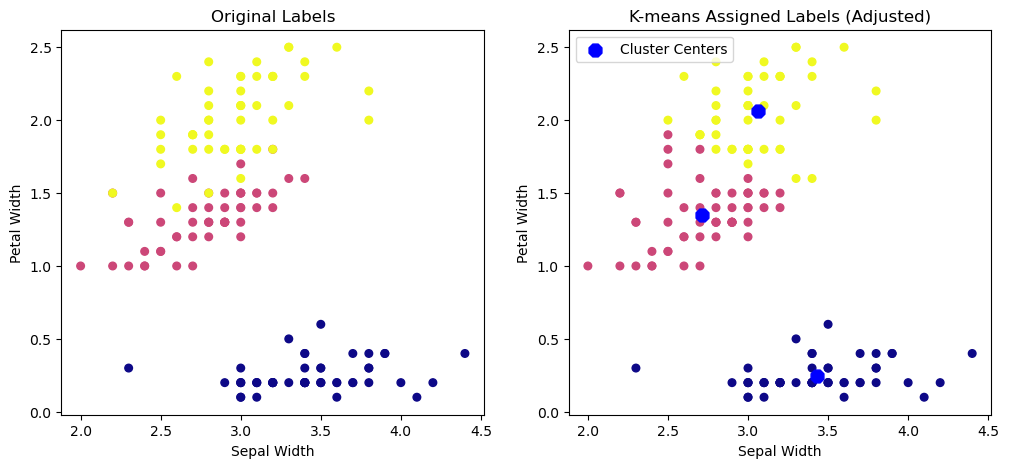

Number of misclassified points: 12
Accuracy = 0.920


In [189]:
# Running K-means clustering

# Which dataset should we choose?
# # Here we use the two features sepal length and pertal length
# x = iris_data.iloc[:, [0,2]]

# # Uncomment the below code for using sepal width and petal width instead
# x = iris_data.iloc[:, [1,3]]

k = 3
show = False
max_iters = 5
centers, kmeans_labels, _ = fit(X, k, max_iters, show)

# Adjusting labels to match the original dataset's labels
adjusted_labels = np.zeros_like(kmeans_labels)
for cluster in range(k):
    mask = (kmeans_labels == cluster)
    majority_class = np.argmax(np.bincount(iris_data['target'][mask]))
    adjusted_labels[mask] = majority_class

# Visualizing both the original graph and the K-means assigned labels (adjusted)
plt.figure(figsize=(12, 5))

# Original Graph
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='plasma', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# K-means Assigned Labels (Adjusted)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=adjusted_labels, cmap='plasma', s=30)
plt.scatter(centers[:, 0], centers[:, 1], marker='8', c='b', s=100, label='Cluster Centers')
plt.title('K-means Assigned Labels (Adjusted)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

plt.show()

#Calculate Error
misclassified_points = np.sum(adjusted_labels != iris_data['target'])

print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))

# # Calculate Adjusted Rand Index (ARI)
# ari = adjusted_rand_score(iris_data['target'], adjusted_labels)
# print(f'Adjusted Rand Index (ARI): {ari:.4f}')

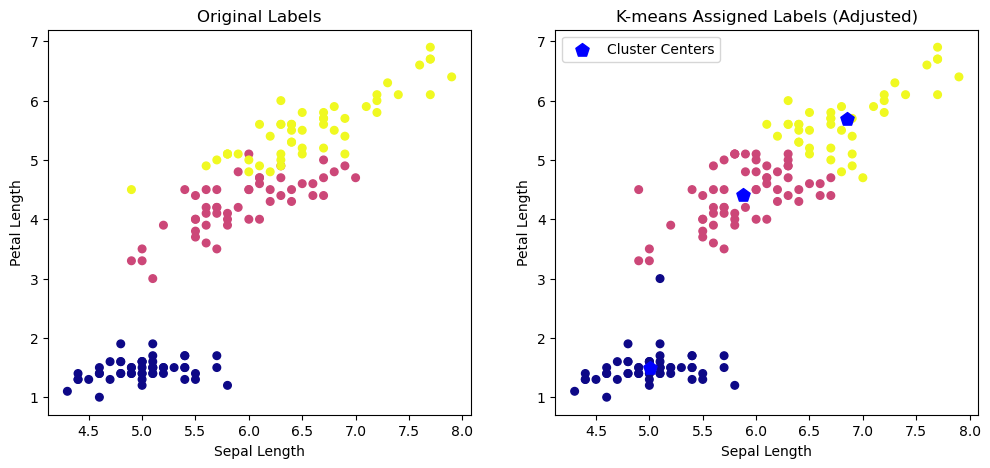

Adjusted Rand Index (ARI): 0.6863
Number of misclassified points: 19
Accuracy = 0.873


In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score

x = iris_data.iloc[:, [1,3]]

iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']

 # using sepal width and petal width instead
x = iris_data.iloc[:, [0, 2]]
X = x.to_numpy()

k = 3
show = False
max_iters = 5
centers, kmeans_labels, _ = fit(X, k, max_iters, show)

# Adjusting labels to match the original dataset's labels
adjusted_labels = np.zeros_like(kmeans_labels)
for cluster in range(k):
    mask = (kmeans_labels == cluster)
    majority_class = np.argmax(np.bincount(iris_data['target'][mask]))
    adjusted_labels[mask] = majority_class

# Counting misclassified points
misclassified_points = np.sum(adjusted_labels != iris_data['target'])

# Visualizing both the original graph and the K-means assigned labels (adjusted)
plt.figure(figsize=(12, 5))

# Original Graph
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='plasma', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# K-means Assigned Labels (Adjusted)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=adjusted_labels, cmap='plasma', s=30)
plt.scatter(centers[:, 0], centers[:, 1], marker='p', c='b', s=100, label='Cluster Centers')
plt.title('K-means Assigned Labels (Adjusted)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

plt.show()

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(iris_data['target'], adjusted_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))


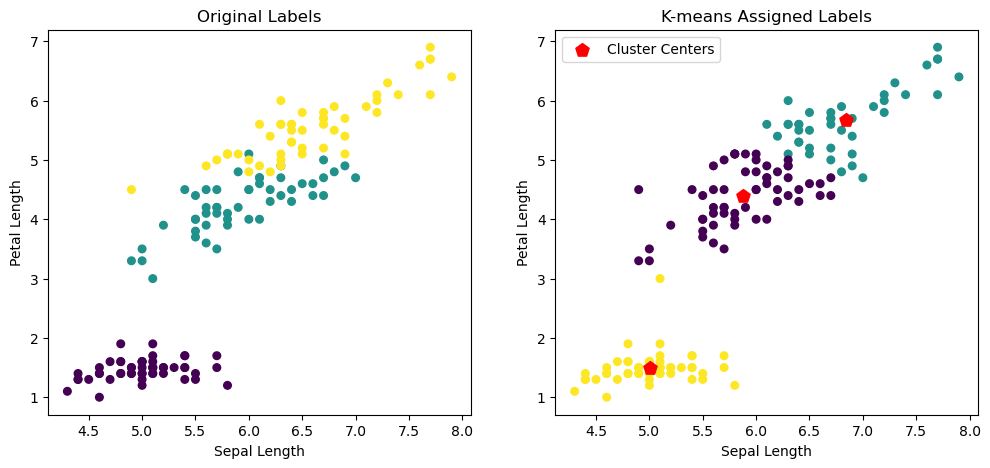

Number of misclassified points: 19
Accuracy = 0.873
Adjusted Rand Index (ARI): 0.6989


In [191]:
#Without classification

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score

x = iris_data.iloc[:, [1,3]]

iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']

 # using sepal width and petal width instead
x = iris_data.iloc[:, [0, 2]]
X = x.to_numpy()

# Running K-means clustering
k = 3
show = False
max_iters = 500
centers, kmeans_labels, _ = fit(X, k, max_iters, show)

# Plotting the original labels and K-means assigned labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='viridis', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(centers[:, 0], centers[:, 1], marker='p', c='r', s=100, label='Cluster Centers')
plt.title('K-means Assigned Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

plt.show()


#Calculate Error
misclassified_points = np.sum(adjusted_labels != iris_data['target'])

print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))

# Calculating the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(iris_data['target'], kmeans_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Scikit-learn Implementation

If you're looking to apply clustering to your data using Python, scikit-learn provides a convenient and user-friendly way to do so. There are multiple algorithms used in clustering, you can explore them [here](https://scikit-learn.org/stable/modules/clustering.html)

In order to implement K-means clustering using scikit-learn, you will need to import the following:

```python
from sklearn.cluster import KMeans
```

You can initialise the algorithm with various parameters:
> More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In order to implement agglomerative hierarchical clustering using scikit-learn, you will need to import the following:

```python
from sklearn.cluster import AgglomerativeClustering
```
You can initialise the algorithm with various parameters:
> More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

## Task 2 [30 marks]

In this task, we will replicate the process carried out in Task 1, but this time, we'll utilize the scikit-learn library to implement K-means clustering. The objective remains the same: to estimate the error or dissimilarity resulting from the clustering and subsequently compare the performance of both approaches.

**Step 1: Implement K-means with scikit-learn**

- Begin by applying K-means clustering to the dataset using the scikit-learn package.
- Obtain the cluster assignments for the data points.

**Step 2: Assessing the Clustering Outcome**

- Next, evaluate the cluster assignments obtained through scikit-learn's K-means clustering.
- Estimate and analyze the error or discrepancy between these cluster assignments and the original dataset labels.

**Step 3: Performance Comparison**

- Compare the results achieved through the scikit-learn implementation with those from Task 1 where you implemented K-means clustering without external libraries in terms of the cluster centers obtained and the error achieved.


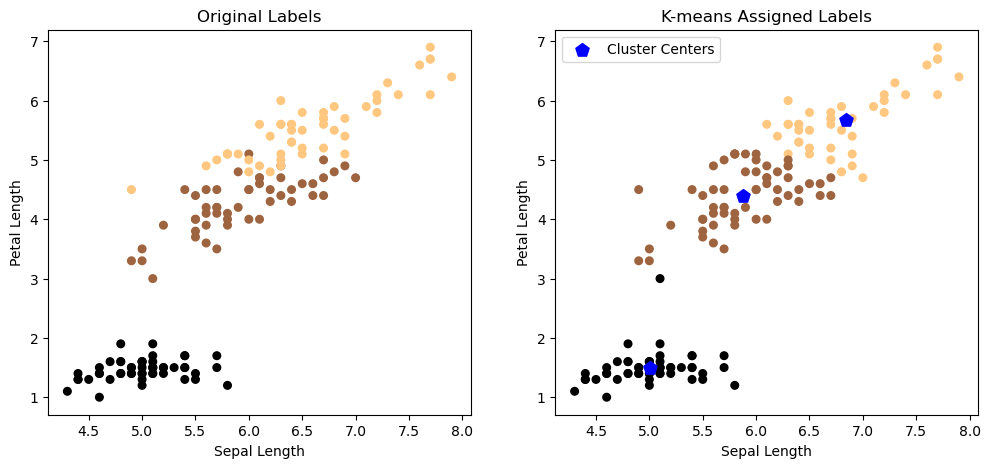

Adjusted Rand Index (ARI): 0.6989
Number of misclassified points: 18
Accuracy = 0.880


In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']

# Select two features (you can change this to [1, 3] for sepal width and petal width)
x = iris_data.iloc[:, [0, 2]]
X = x.to_numpy()

# Running K-means clustering with scikit-learn
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualizing both the original graph and the K-means assigned labels
plt.figure(figsize=(12, 5))

# Original Graph
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='copper', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# K-means Assigned Labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='copper', s=30)
plt.scatter(centers[:, 0], centers[:, 1], marker='p', c='b', s=100, label='Cluster Centers')
plt.title('K-means Assigned Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

plt.show()

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(iris_data['target'], kmeans_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Counting misclassified points
misclassified_points = np.sum(kmeans_labels != iris_data['target'])
print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))


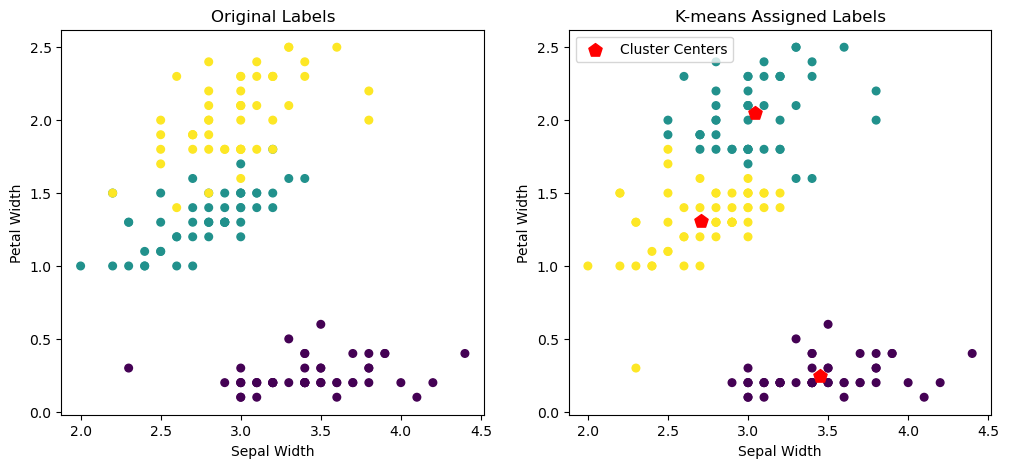

Adjusted Rand Index (ARI): 0.7972
Number of misclassified points: 91
Accuracy = 0.393


In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']

# Select two features (you can change this to [1, 3] for sepal width and petal width)
x = iris_data.iloc[:, [1, 3]]
X = x.to_numpy()

# Running K-means clustering with scikit-learn
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualizing both the original graph and the K-means assigned labels
plt.figure(figsize=(12, 5))

# Original Graph
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='viridis', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# K-means Assigned Labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(centers[:, 0], centers[:, 1], marker='p', c='r', s=100, label='Cluster Centers')
plt.title('K-means Assigned Labels')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

plt.show()

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(iris_data['target'], kmeans_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Counting misclassified points
misclassified_points = np.sum(kmeans_labels != iris_data['target'])
print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))


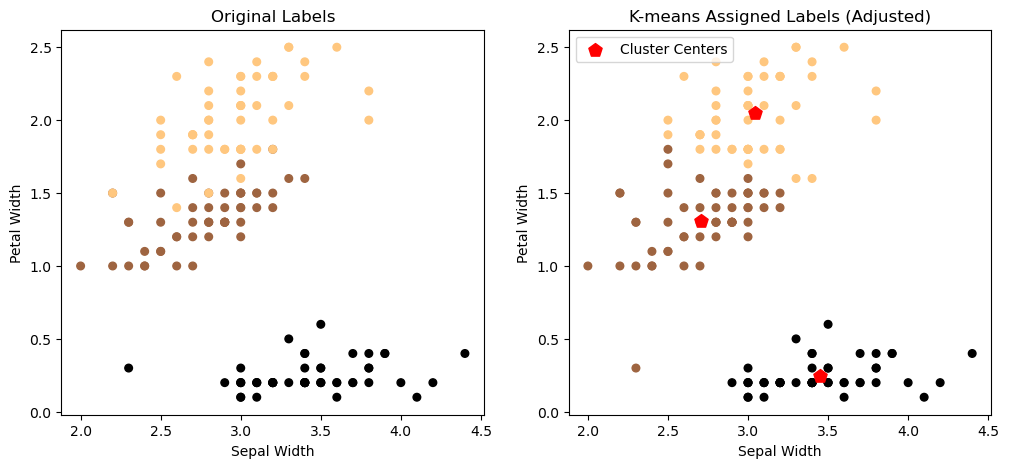

Adjusted Rand Index (ARI): 0.7972
Number of misclassified points: 11
Accuracy = 0.927


In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']

# Select two features (you can change this to [1, 3] for sepal width and petal width)
x = iris_data.iloc[:, [1, 3]]
# x = iris_data.iloc[:, [0, 2]] if the other parameter is chosen

X = x.to_numpy()

# Running K-means clustering with scikit-learn
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Mapping cluster labels to true labels
label_mapping = {}
for i in range(k):
    true_label = np.argmax(np.bincount(iris_data['target'][kmeans_labels == i]))
    label_mapping[i] = true_label

adjusted_labels = np.array([label_mapping[label] for label in kmeans_labels])

# Visualizing both the original graph and the K-means assigned labels
plt.figure(figsize=(12, 5))

# Original Graph
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='copper', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# K-means Assigned Labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=adjusted_labels, cmap='copper', s=30)
plt.scatter(centers[:, 0], centers[:, 1], marker='p', c='r', s=100, label='Cluster Centers')
plt.title('K-means Assigned Labels (Adjusted)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

plt.show()

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(iris_data['target'], adjusted_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Counting misclassified points
misclassified_points = np.sum(adjusted_labels != iris_data['target'])
print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))


## Task 3 [30 marks]

- Write a code using agglomerative hierarchical clustering for the same dataset and estimate the error of your predictions. (You can use scikitlearn package for this task)

In this task, your assignment is to implement Agglomerative Hierarchical Clustering on the given dataset. You will then compare the cluster labels generated by this clustering method with the true labels in order to calculate and analyse the error.

**Step 1: Implement Agglomerative Hierarchical Clustering**

- Your first task is to write code to apply Agglomerative Hierarchical Clustering to the dataset.

**Step 2: Compare Predicted Labels with True Labels**

- Once you have the cluster assignments from the Agglomerative Hierarchical Clustering, compare them with the true labels provided in the dataset.
- Calculate the error between the predicted cluster labels and the actual labels.



> You are allowed to use scikit-learn package in this task by importing the following:

```python
from sklearn.cluster import AgglomerativeClustering
```



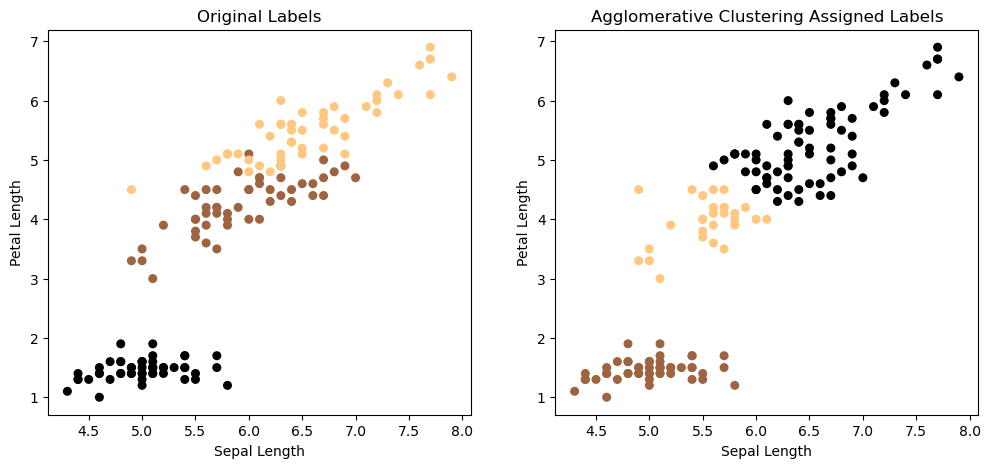

Adjusted Rand Index (ARI): 0.6423
Number of misclassified points: 149
Accuracy = 0.007


In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']

# Select two features (you can change this to [1, 3] for sepal width and petal width)
x = iris_data.iloc[:, [0, 2]]
X = x.to_numpy()

# Running Agglomerative Clustering with scikit-learn
k = 3
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_labels = agg_clustering.fit_predict(X)

# Visualizing both the original graph and the Agglomerative Clustering assigned labels
plt.figure(figsize=(12, 5))

# Original Graph
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='copper', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Agglomerative Clustering Assigned Labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='copper', s=30)
plt.title('Agglomerative Clustering Assigned Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.show()

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(iris_data['target'], agg_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Counting misclassified points
misclassified_points = np.sum(agg_labels != iris_data['target'])
print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))


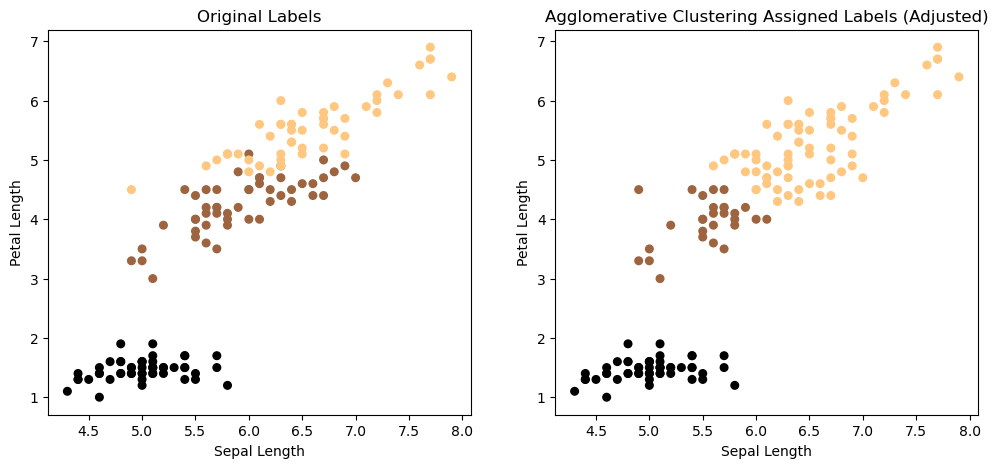

Adjusted Rand Index (ARI): 0.6423
Number of misclassified points: 24
Accuracy = 0.840


In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']

# Select two features (you can change this to [0, 2] for sepal length and petal length)
x = iris_data.iloc[:, [0, 2]]
# # Select two features (you can change this to [1, 3] for sepal width and petal width)
# x = iris_data.iloc[:, [1, 3]]
X = x.to_numpy()

# Running Agglomerative Clustering with scikit-learn
k = 3
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_labels = agg_clustering.fit_predict(X)

# Mapping cluster labels to true labels
label_mapping = {}
for i in range(k):
    true_label = np.argmax(np.bincount(iris_data['target'][agg_labels == i]))
    label_mapping[i] = true_label

adjusted_labels = np.array([label_mapping[label] for label in agg_labels])

# Visualizing both the original graph and the Agglomerative Clustering assigned labels
plt.figure(figsize=(12, 5))

# Original Graph
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='copper', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Agglomerative Clustering Assigned Labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=adjusted_labels, cmap='copper', s=30)
plt.title('Agglomerative Clustering Assigned Labels (Adjusted)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.show()

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(iris_data['target'], adjusted_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Counting misclassified points
misclassified_points = np.sum(adjusted_labels != iris_data['target'])
print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))


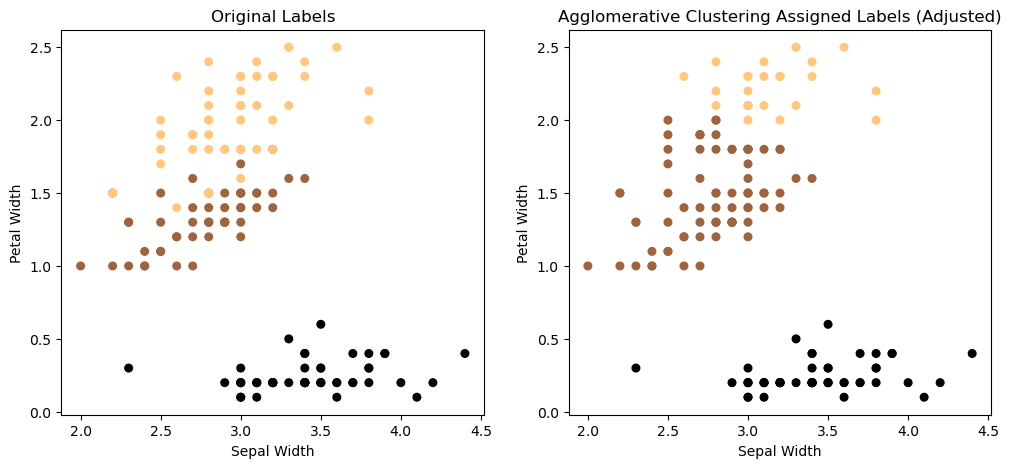

Adjusted Rand Index (ARI): 0.6444
Number of misclassified points: 24
Accuracy = 0.840


In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']

# Select two features (you can change this to [1, 3] for sepal width and petal width)
x = iris_data.iloc[:, [1, 3]]
X = x.to_numpy()

# Running Agglomerative Clustering with scikit-learn
k = 3
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_labels = agg_clustering.fit_predict(X)

# Mapping cluster labels to true labels
label_mapping = {}
for i in range(k):
    true_label = np.argmax(np.bincount(iris_data['target'][agg_labels == i]))
    label_mapping[i] = true_label

adjusted_labels = np.array([label_mapping[label] for label in agg_labels])

# Visualizing both the original graph and the Agglomerative Clustering assigned labels
plt.figure(figsize=(12, 5))

# Original Graph
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris_data['target'], cmap='copper', s=30)
plt.title('Original Labels')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Agglomerative Clustering Assigned Labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=adjusted_labels, cmap='copper', s=30)
plt.title('Agglomerative Clustering Assigned Labels (Adjusted)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.show()

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(iris_data['target'], adjusted_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Counting misclassified points
misclassified_points = np.sum(adjusted_labels != iris_data['target'])
print(f'Number of misclassified points: {misclassified_points}')

print("Accuracy = {:.3f}".format(1 - misclassified_points / 150))
